In [1]:
# Importando as bibliotecas que serão utilizadas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [2]:
# Importando a base de dados a ser utilizada

credito = pd.read_csv(r'D:\Lucas\Estudos\Ciência de dados\31.Prática em Python\dados\Credit.csv', sep=',')
print(credito.shape)
credito.head()

(1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
# Formato de matriz
previsores = credito.iloc[:, 0:20].values

previsores

In [ ]:
classe = credito.iloc[:, 20].values

classe

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# É necessário criar um objeto para cada atributo categórico, pois na sequência será executado o processo de enconding novamente para o registro do teste
# Se forem utilizados objetos diferentes, o número de atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente

# Montei um laço onde é identificado quais colunas tem dados não numéricos para serem transformados, e cria um objeto Label Encoder para cada coluna

for i in range(len(previsores[0])):
    if (type(previsores[0][i]) != 'int') and (type(previsores[0][i]) != 'float'):
        globals().__setitem__('labelencoder'+str(i), LabelEncoder())
        previsores[:, i] = globals()['labelencoder'+str(i)].fit_transform(previsores[:, i])
        
previsores

In [6]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)

X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [7]:
#Criando e treinando o modelo (geração da tabela de probabilidades)

naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, Y_treinamento)

GaussianNB()

In [8]:
# Realizando previsões com valores de teste

previsoes = naive_bayes.predict(X_teste)

In [9]:
# Criando a matriz de confusão

confusao = confusion_matrix(Y_teste, previsoes)
confusao

array([[ 52,  34],
       [ 56, 158]], dtype=int64)

In [10]:
# Calculando a taxa de acerto

taxa_acerto = accuracy_score(Y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.7

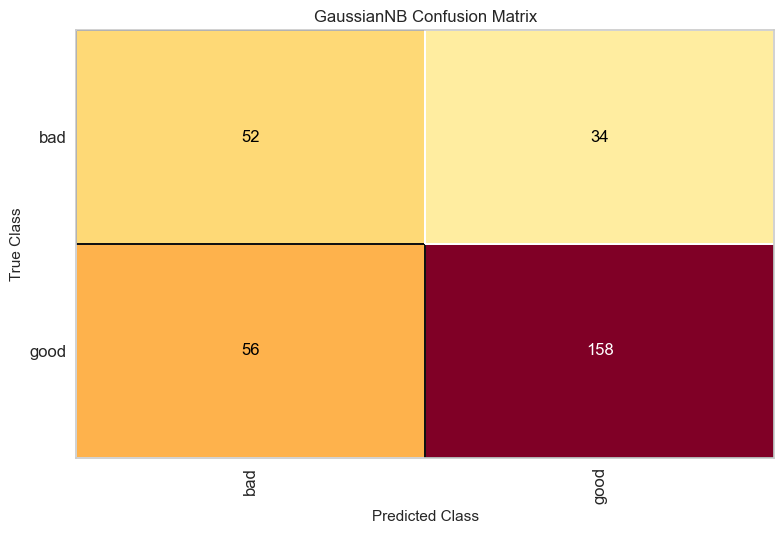

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, Y_treinamento)
v.score(X_teste, Y_teste)
v.poof()

In [12]:
v

ConfusionMatrix(ax=<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002B5DFF4F4C0>,
                estimator=GaussianNB())

In [13]:
# Previsao com novo registro, transformando os atributos categóricos em númericos

novo_credito = pd.read_csv(r'D:\Lucas\Estudos\Ciência de dados\31.Prática em Python\dados\NovoCredit.csv', sep=',')
print(novo_credito.shape)
novo_credito.head()

(1, 20)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [14]:
#Será usado o mesmo objeto criado antes para manter o padrão dos dados
#Será chamado somente o método "transform", pois a adatapação aos dados (fit) já foi feita anteriormente

novo_credito = novo_credito.iloc[:, 0:20].values

for i in range(len(novo_credito[0])):
    if (type(novo_credito[0][i]) != 'int') and (type(novo_credito[0][i]) != 'float'):
        novo_credito[:, i] = globals()['labelencoder'+str(i)].transform(novo_credito[:, i])

novo_credito

array([[0, 8, 3, 7, 69, 3, 3, 3, 3, 2, 3, 3, 19, 1, 1, 0, 3, 0, 0, 1]],
      dtype=object)

In [15]:
# Resultado da previsão

naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')